# Fikspunktiterasjoner

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Dato: **15. september 2025**

## Røtter av ikke-lineære ligninger

Vi sier at $x_0$ er en rot eller et nullpunkt til $f(x)$ dersom

$$
f(x)=0.
$$

En ikke-lineær ligning kan ha en, flere, eller ingen røtter.

### Eksempel

Gitt funksjonen $f(x)=x^2-2$ for $x\in[-2,2]$. Skisser grafen til funksjonen ved å bruke følgende kode:

In [1]:
%matplotlib inline

# fikser litt på pyplot
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

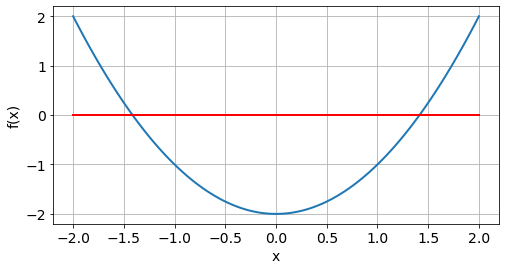

In [2]:
def f(x):                   # definerer funksjonen i eksempelet over
    return x**2-2

# plotter funksjonen på et intervall 
x = np.linspace(-2, 2, 101)     # antall x-verdier i intervallet [-2,2]
plt.plot(x, f(x))               # plotter funksjonen f(x) i blått
plt.plot(x, 0*x, 'r')           # plotter x-aksen i rødt
plt.xlabel('x')
plt.grid(True)
plt.ylabel('f(x)');

I følge plottet bør funksjonen $f(x)$ ha 2 røtter, og disse er $x=-\sqrt{2}$ og $x=\sqrt{2}$.

Hvordan finner vi disse numerisk?

## Fikspunktiterasjoner

Vi sier at $x_0$ er et fikspunkt til $F(x)$ dersom

$$
F(x_0)=x_0.
$$


### Eksempel

Definer 

$$
F(x)=\frac{1}{2}\left(x+\frac{2}{x}\right).
$$

Vi ser at $f(x)=0$ og $F(x)=x$ har samme løsningsmengde for $x>0$ siden

$$
x=\frac{1}{2}\left(x+\frac{2}{x}\right)\qquad\Longrightarrow\qquad x^2-2=0.
$$

Vi definerer nå følgen $\{a_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ til å være gitt rekursivt som

$$
a_{n+1}=F(a_n),\qquad\text{med startverdien $a_0$,}
$$

og vi skal se at denne konvergerer mot $\sqrt{2}$. Legg merke til at $F(\sqrt{2})=\sqrt{2}$.

In [3]:
import numpy as np

# generisk iterativ fikspunktmetode
def fikspunkt(F, a, toleranse = 1.0E-10, N = 500):
    Fa = F(a)
    n = 0
    punkter = [(a, Fa)] 
    while abs(Fa-a) >= toleranse and n < N: # vi gjør dette mens |F(x)-x|<toleranse og n<N
        a = F(a)   # ny startverdi
        n = n+1    # ny n
        Fa = F(a)  # ny F(x)
        punkter.append((a, Fa))
    if n >= N:
        print("Fant ikke fikspunkt for gitt startverdi. Returnerer nåværende verdier.")
        return Fa, punkter
    else: 
        return Fa, punkter

In [4]:
# definerer funksjonen vi skal bruke
def F(x):
    return 0.5*(x+(2/x))

# finner fikspunkt med gitt startverdi
svar, punkter = fikspunkt(F, 9)

# skriver ut punkter
for punkt in punkter:
    print('x = {:1.15f}\t F(x) = {:1.15f}'.format(*punkt))

x = 9.000000000000000	 F(x) = 4.611111111111111
x = 4.611111111111111	 F(x) = 2.522423025435073
x = 2.522423025435073	 F(x) = 1.657655721288586
x = 1.657655721288586	 F(x) = 1.432089434900886
x = 1.432089434900886	 F(x) = 1.414325129015109
x = 1.414325129015109	 F(x) = 1.414213566773468
x = 1.414213566773468	 F(x) = 1.414213562373095
x = 1.414213562373095	 F(x) = 1.414213562373095


Vi kan også visualisere dette geometrisk.

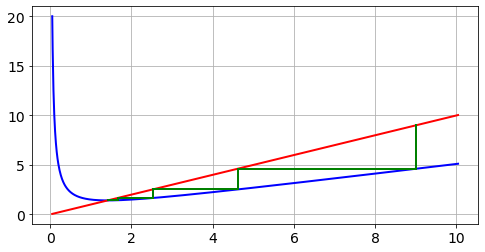

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.05, 10.05, 0.01) # lager mesh for grafer på en annen måte enn tidligere

# fikspunktet inntreffer når følgende grafer skjærer hverandre
plt.plot(x, F(x), 'b') # plotter F(x) i blått 
plt.plot(x, x, 'r')    # plotter y = x i rødt

# visualiser fikspunktiterasjonen i grønt
for x, y in punkter:
    plt.plot([x, x], [x, y], 'g') # lager vertikal linje mellom punktene (x,x) og (x,y)
    plt.plot([x, y], [y, y], 'g') # lager horisontal linje mellom punktene (x,y) og (y,y)
plt.show()

Hvis $a_0>\sqrt{2}$, kan vi vise at $a_{n}>\sqrt{2}$ og $a_{n+1}\leq a_{n}$ for alle $n\geq0$. Dermed konvergerer $\{a_n\}_{n=0}^{\infty}$ og $\lim_{n\to\infty} a_n=\sqrt{2}$.

Hvorfor må grenseverdien være $\sqrt{2}$?